In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [2]:
df_train=pd.read_csv('datatraining.txt')
df_test=pd.read_csv('datatest.txt')

In [3]:
df_test

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           8143 non-null   object 
 1   Temperature    8143 non-null   float64
 2   Humidity       8143 non-null   float64
 3   Light          8143 non-null   float64
 4   CO2            8143 non-null   float64
 5   HumidityRatio  8143 non-null   float64
 6   Occupancy      8143 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 508.9+ KB


In [5]:
df_train.drop(['date'],axis=1,inplace=True)

In [6]:
df_train['Occupancy'].value_counts(normalize=True)

0    0.78767
1    0.21233
Name: Occupancy, dtype: float64

In [7]:
#The data is highly skewed and would result in a biased predixtion towards in occupancy

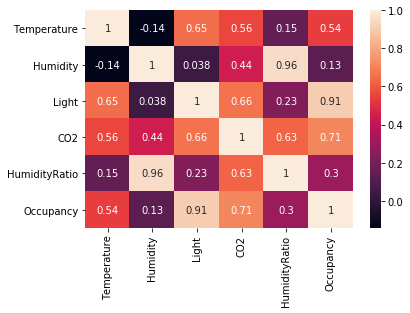

In [8]:
sns.heatmap(df_train.corr(), annot=True)

In [9]:
#The occupancy is directly correlated to the features-Temperature,Light,CO2 and slightly towards Humidity Ratio
#On further observation it is seen that Humidity and Humidity Ratio are very highly correlated

In [10]:
df_train.drop(['Humidity'],axis=1,inplace=True)

In [11]:
df_train.head()

,Temperature,Light,CO2,HumidityRatio,Occupancy
1,23.18,426.0,721.25,0.004793,1
2,23.15,429.5,714.00,0.004783,1
3,23.15,426.0,713.50,0.004779,1
4,23.15,426.0,708.25,0.004772,1
5,23.10,426.0,704.50,0.004757,1


In [12]:
X=df_train.iloc[:,:-1]
y=df_train.iloc[:,-1]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [15]:
#SMOTE

In [16]:
X_train.shape,y_train.shape,y_train.value_counts()

((6514, 4),
 (6514,),
 0    5150
 1    1364
 Name: Occupancy, dtype: int64)

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

Using TensorFlow backend.


In [18]:
X_train_res.shape,y_train_res.shape

((10300, 4), (10300,))

In [19]:
X_train_res

,Temperature,Light,CO2,HumidityRatio
0,19.390000,0.000000,465.500000,0.003655
1,20.290000,0.000000,458.000000,0.002804
2,21.290000,0.000000,578.000000,0.003264
3,22.066667,423.666667,1796.666667,0.006217
4,20.500000,0.000000,440.000000,0.003125
...,...,...,...,...
10295,22.100000,497.966098,884.402260,0.003554
10296,21.964980,554.321438,732.533681,0.003213
10297,21.223516,433.000000,820.519171,0.003732
10298,22.100000,429.456295,1826.149847,0.006257


In [20]:
#Scaling

In [21]:
#sc=StandardScaler()
#X_train_res=sc.fit(X_train_res)
#X_test=sc.transform(X_test)

In [22]:
#Modelling

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
classifier=RandomForestClassifier(n_estimators=100,bootstrap=True)
classifier.fit(X_train_res,y_train_res)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
from sklearn.metrics import accuracy_score
y_pred=classifier.predict(X_test)
score=accuracy_score(y_test,y_pred)

In [26]:
score

0.9914057704112953

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
cm_rf = confusion_matrix(y_test,y_pred)

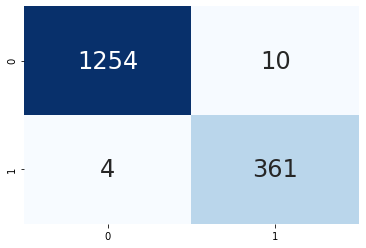

In [29]:
sns.heatmap(cm_rf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [30]:
#The model seems to be performing pretty good.


In [31]:
#Neural Network

In [41]:
from keras import Sequential
from keras.layers import Dense,Dropout
model = Sequential()
model.add(Dense(4, activation='relu', kernel_initializer='random_normal', input_dim=4,name='Input_Layer'))
Dropout(0.2)
model.add(Dense(16, activation='relu', kernel_initializer='random_normal',name='First_Layer'))
Dropout(0.2)
model.add(Dense(16, activation='relu', kernel_initializer='random_normal',name='Second_Layer'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal',name='Output'))

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_Layer (Dense)          (None, 4)                 20        
_________________________________________________________________
First_Layer (Dense)          (None, 16)                80        
_________________________________________________________________
Second_Layer (Dense)         (None, 16)                272       
_________________________________________________________________
Output (Dense)               (None, 1)                 17        
Total params: 389
Trainable params: 389
Non-trainable params: 0
_________________________________________________________________


In [44]:
model.compile(optimizer ='adam',loss='binary_crossentropy', metrics =['accuracy'])
model.fit(X_train_res,y_train_res, batch_size=16, epochs=20)
val_loss, val_acc = model.evaluate(X_test, y_test)
print("The validation accuracy=",val_acc)

Epoch 1/20
10300/10300 [==============================] - 3s 306us/step - loss: 0.0412 - accuracy: 0.9917
Epoch 2/20
10300/10300 [==============================] - 3s 254us/step - loss: 0.0391 - accuracy: 0.9917
Epoch 3/20
10300/10300 [==============================] - 2s 240us/step - loss: 0.0401 - accuracy: 0.9918
Epoch 4/20
10300/10300 [==============================] - 3s 265us/step - loss: 0.0393 - accuracy: 0.9921
Epoch 5/20
10300/10300 [==============================] - 3s 284us/step - loss: 0.0409 - accuracy: 0.9917
Epoch 6/20
10300/10300 [==============================] - 2s 241us/step - loss: 0.0398 - accuracy: 0.9919
Epoch 7/20
10300/10300 [==============================] - 3s 295us/step - loss: 0.0402 - accuracy: 0.9917
Epoch 8/20
10300/10300 [==============================] - 3s 299us/step - loss: 0.0406 - accuracy: 0.9916
Epoch 9/20
10300/10300 [==============================] - 3s 301us/step - loss: 0.0402 - accuracy: 0.9919
Epoch 10/20
10300/10300 [=====================

In [48]:
y_pred_neural=model.predict(X_test)
y_pred_neural =(y_pred_neural>0.5)

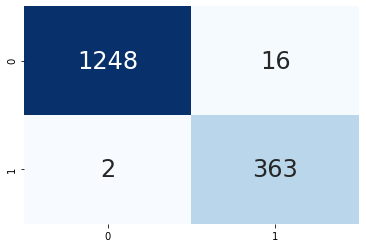

In [49]:
cm_neural = confusion_matrix(y_test,y_pred_neural)
sns.heatmap(cm_neural,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [50]:
#Therefore,we can see that the RandomForest Classifier is woring slightly well...


In [51]:
import pickle
pickle_out=open("classifier.pkl","wb")
pickle.dump(classifier,pickle_out)
pickle_out.close()